# Library

In [1]:
# !python -m pip install keras-tuner
# !python -m pip install tensorflow_hub

In [2]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras_tuner as kt
import imghdr

from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.python.client import device_lib
from platform import python_version


In [3]:
# Checking Environment

print("Using Tensorflow version: ", tf.__version__)
print("Using Python version: ", python_version())
print(tf.config.list_physical_devices())

if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
    print(device_lib.list_local_devices())
else:
    print("No GPU Device")

Using Tensorflow version:  2.9.0
Using Python version:  3.8.13
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Default GPU Device:/device:GPU:0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14281416979567405419
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2004588955
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12667019335488347219
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


# Param

In [4]:
# Customizeable Param

BATCH_SIZE = 32

IMAGE_HEIGHT = 128                     # Input Image Height 
IMAGE_WIDTH = 128                      # Input Image Width

DATA_DIR = "./Datasets"                # Datasets Directory

EPOCH = 1000                           # Number of Epoch when training

seed=123                               # Seed used for image data generator to splits training and validation datasets

SAVED_MODEL_DIR = "./saved_model/6"    # Directory to save model
LOAD_MODEL_DIR = "./saved_model/6"     # Directory to load model

# Load & Preprocessing Images

### Checking if Image is Valid

In [5]:
# Image Extenstions that we will use
image_extensions = [".png", ".jpg"]

# Image Type that Tensorflow support
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(DATA_DIR).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image, removing image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow, removing image")
            os.remove(filepath)

### Data Augmentation

In [6]:
train_datagen = ImageDataGenerator(
     rescale=1./255,
     rotation_range=40,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True,
     fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2
)

print("Training Data :")
train_data = train_datagen.flow_from_directory(
        DATA_DIR, 
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=32,
        subset="training",
        class_mode='categorical',
        seed=seed,
)

print("Validation Data :")
validation_data = validation_datagen.flow_from_directory(
        DATA_DIR,
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=32,
        subset="validation",
        class_mode='categorical',
        seed=seed
)


label_map = (train_data.class_indices)
print("\nList of Classes")
print(label_map)

Training Data :
Found 3801 images belonging to 32 classes.
Validation Data :
Found 748 images belonging to 32 classes.

List of Classes
{'culture-reog-ponorogo': 0, 'culture-rumah-bolon': 1, 'culture-rumah-gadang-minangkabau': 2, 'culture-rumah-honai': 3, 'culture-rumah-joglo': 4, 'culture-uma-kelada': 5, 'food-kerak-telor': 6, 'food-martabak-asin': 7, 'food-martabak-manis': 8, 'food-nasi-tumpeng': 9, 'food-rendang': 10, 'food-tempe-goreng': 11, 'kue-dadar-gulung': 12, 'kue-kastengel': 13, 'kue-klepon': 14, 'kue-lapis': 15, 'kue-lumpur': 16, 'kue-putri-salju': 17, 'kue-risoles': 18, 'kue-serabi': 19, 'landmark-borobudur': 20, 'landmark-candi-prambanan': 21, 'landmark-gedung-sate': 22, 'landmark-gwk': 23, 'landmark-jam-gadang': 24, 'landmark-masjid-raya-baiturrahman': 25, 'landmark-menara-kudus': 26, 'landmark-monas': 27, 'landmark-patung-suroboyo': 28, 'landmark-pura-tanah-lot': 29, 'landmark-tugu-khatulistiwa': 30, 'landmark-tugu-yogyakarta': 31}


### Training Image Example

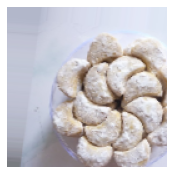

kue-putri-salju


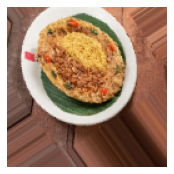

food-kerak-telor


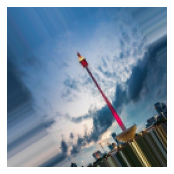

landmark-monas


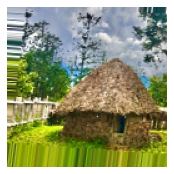

culture-rumah-honai


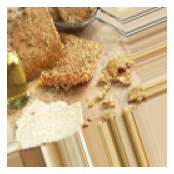

food-tempe-goreng


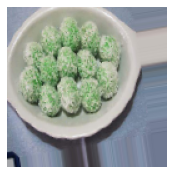

kue-klepon


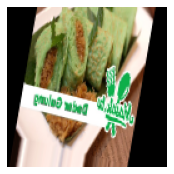

kue-dadar-gulung


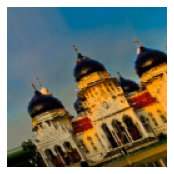

landmark-masjid-raya-baiturrahman


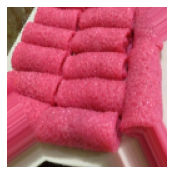

kue-dadar-gulung


In [7]:
for img in train_data:
    images = img[0]
    labels = img[1]
    for i in range(9):
        plt.figure(figsize=(10, 10))
        label = img[1][i]
        plt.subplot(3, 3, i + 1)
        plt.imshow((images[i]))
        plt.axis("off")
        plt.show()
        print(list(label_map.keys())[list(label_map.values()).index(label.argmax(axis=-1))])
        print("=====================================================")
    break


### Validation Image Example

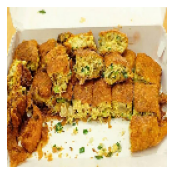

food-martabak-asin


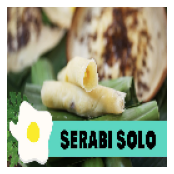

kue-serabi


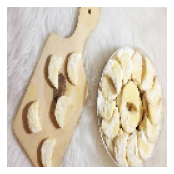

kue-putri-salju


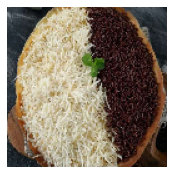

food-martabak-manis


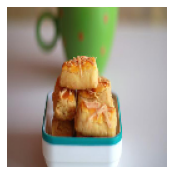

kue-kastengel


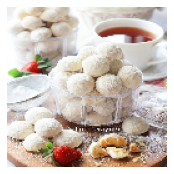

kue-putri-salju


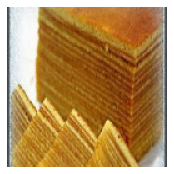

kue-lapis


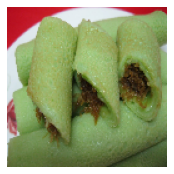

kue-dadar-gulung


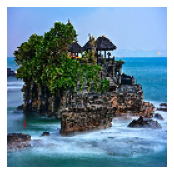

landmark-pura-tanah-lot


In [8]:
for img in validation_data:
    images = img[0]
    labels = img[1]
    for i in range(9):
        plt.figure(figsize=(10, 10))
        label = img[1][i]
        plt.subplot(3, 3, i + 1)
        plt.imshow((images[i]))
        plt.axis("off")
        plt.show()
        print(list(label_map.keys())[list(label_map.values()).index(label.argmax(axis=-1))])
        print("=====================================================")
    break

# Model

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 
                           (3,3), 
                           activation='relu', 
                           kernel_regularizer= tf.keras.regularizers.l2(0.01), 
                           padding="same",
                           input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D(),
    
    tf.keras.layers.Conv2D(64, 
                           (3,3), 
                           activation='relu', 
                           kernel_regularizer= tf.keras.regularizers.l2(0.01), 
                           padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D(),
    
    tf.keras.layers.Conv2D(96, 
                           (3,3), 
                           activation='relu', 
                           kernel_regularizer= tf.keras.regularizers.l2(0.01), 
                           padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D(),
    
    tf.keras.layers.Conv2D(144, 
                           (3,3), 
                           activation='relu', 
                           kernel_regularizer= tf.keras.regularizers.l2(0.01), 
                           padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(label_map), activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy']
             )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 64, 64, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                        

# Training Model

### Instantiate Callbacks

In [10]:
# A callback class when a certain threshold is met
class thresholdCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc') is not None and logs.get('acc') > 0.95:
            print("\nLoss is lower than 0.95 so cancelling training!")
            self.model.stop_training = True

# A threshold callbacks instance
thresholdCallbacks = thresholdCallbacks()

# A overtfit callbacks instance
overfitCallback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience = 10)

# A checkpoint callbacks to save the best val accuracy weight
checkpoint_filepath = './tmp/checkpoint/'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [11]:
history = model.fit(
    train_data,
    epochs=EPOCH,
    verbose=1,
    validation_data=validation_data,
    callbacks=[
        overfitCallback,
        model_checkpoint_callback,
        thresholdCallbacks
    ]
)

Epoch 1/1000
 50/119 [===========>..................] - ETA: 1:12 - loss: 5.4580 - accuracy: 0.1839

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


119/119 [==============================] - 163s 1s/step - loss: 5.1250 - accuracy: 0.2418 - val_loss: 5.7501 - val_accuracy: 0.0521
Epoch 2/1000
119/119 [==============================] - 139s 1s/step - loss: 4.4096 - accuracy: 0.3552 - val_loss: 5.6460 - val_accuracy: 0.1083
Epoch 3/1000
119/119 [==============================] - 134s 1s/step - loss: 4.0760 - accuracy: 0.3904 - val_loss: 5.3853 - val_accuracy: 0.2019
Epoch 4/1000
119/119 [==============================] - 133s 1s/step - loss: 3.7913 - accuracy: 0.4462 - val_loss: 4.5218 - val_accuracy: 0.2781
Epoch 5/1000
119/119 [==============================] - 136s 1s/step - loss: 3.5320 - accuracy: 0.4699 - val_loss: 3.8903 - val_accuracy: 0.3904
Epoch 6/1000
119/119 [==============================] - 139s 1s/step - loss: 3.3685 - accuracy: 0.4914 - val_loss: 3.5124 - val_accuracy: 0.4773
Epoch 7/1000
119/119 [==============================] - 139s 1s/step - loss: 3.1988 - accuracy: 0.5120 - val_loss: 3.0501 - val_accuracy: 0.542

### Result plot

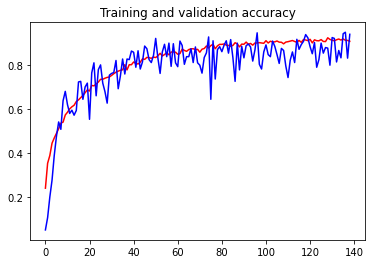

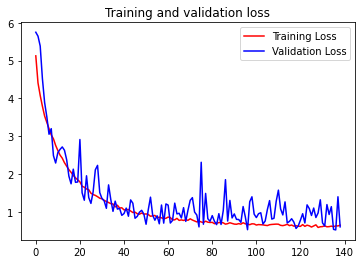

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Export

In [13]:
model.load_weights("./tmp/checkpoint/")

In [14]:
model.save(SAVED_MODEL_DIR)

converter = tf.lite.TFLiteConverter.from_saved_model(SAVED_MODEL_DIR)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: ./saved_model/6\assets


INFO:tensorflow:Assets written to: ./saved_model/6\assets


In [15]:
tflite_model_file = Path(SAVED_MODEL_DIR+'/model.tflite')
tflite_model_file.write_bytes(tflite_model)

511088

## Testing

In [16]:
model.summary()
print(model.evaluate(validation_data, verbose=2))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 64, 64, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                        

### TFlite Intrepreter testing

In [17]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()       

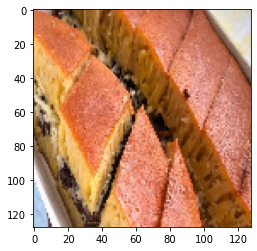

This image most likely belong to food-martabak-manis with a 99.95 percent confidence


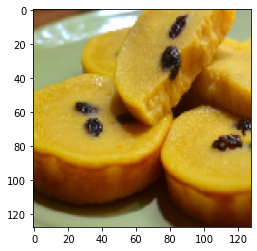

This image most likely belong to kue-lumpur with a 100.00 percent confidence


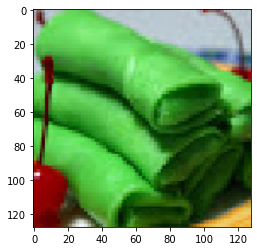

This image most likely belong to kue-dadar-gulung with a 100.00 percent confidence


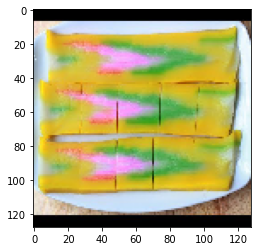

This image most likely belong to kue-lapis with a 99.99 percent confidence


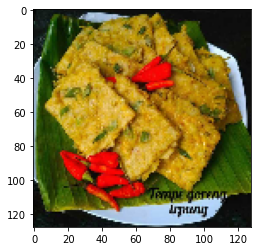

This image most likely belong to food-tempe-goreng with a 100.00 percent confidence


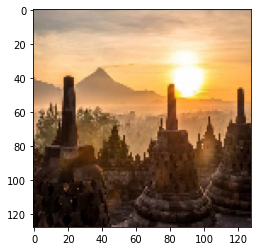

This image most likely belong to landmark-borobudur with a 100.00 percent confidence


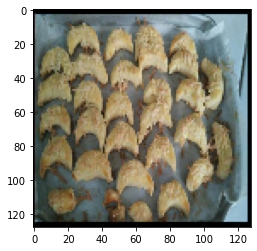

This image most likely belong to kue-putri-salju with a 49.85 percent confidence


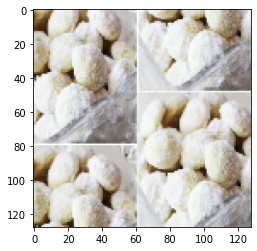

This image most likely belong to kue-putri-salju with a 100.00 percent confidence


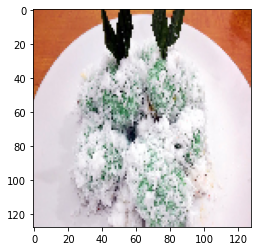

This image most likely belong to kue-klepon with a 100.00 percent confidence


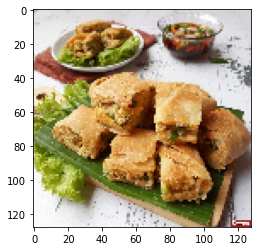

This image most likely belong to food-martabak-asin with a 98.28 percent confidence


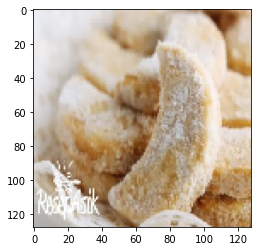

This image most likely belong to kue-putri-salju with a 99.55 percent confidence


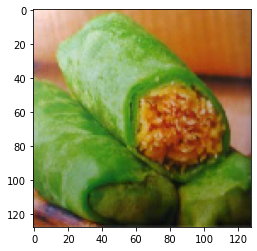

This image most likely belong to kue-dadar-gulung with a 98.49 percent confidence


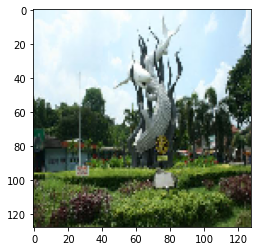

This image most likely belong to landmark-patung-suroboyo with a 100.00 percent confidence


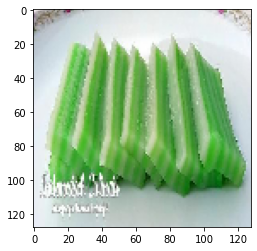

This image most likely belong to kue-lapis with a 100.00 percent confidence


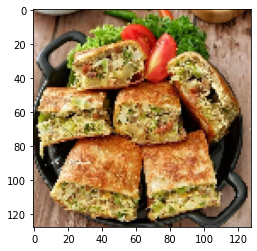

This image most likely belong to food-martabak-asin with a 100.00 percent confidence


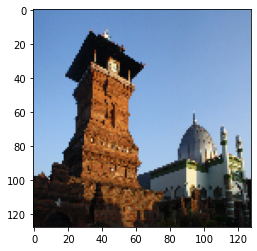

This image most likely belong to landmark-menara-kudus with a 99.90 percent confidence


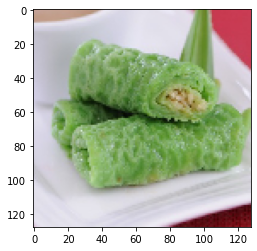

This image most likely belong to kue-dadar-gulung with a 92.91 percent confidence


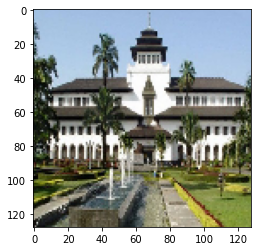

This image most likely belong to landmark-gedung-sate with a 100.00 percent confidence


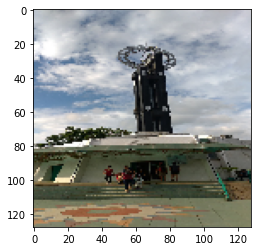

This image most likely belong to landmark-tugu-khatulistiwa with a 99.99 percent confidence


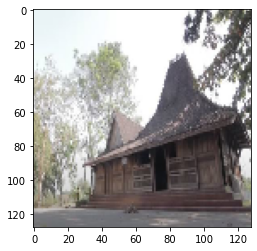

This image most likely belong to culture-rumah-joglo with a 99.26 percent confidence


In [27]:
class_names = dict((v,k) for k,v in label_map.items())
for _ in range(20):
    img, label = validation_data.next()
    plt.imshow(img[0])
    plt.show()
    output = interpreter.get_output_details()[0]
    input = interpreter.get_input_details()[0]
    interpreter.set_tensor(input['index'], tf.expand_dims(img[0], 0))
    interpreter.invoke()
    print("This image most likely belong to {} with a {:.2f} percent confidence"
          .format(class_names[np.argmax(interpreter.get_tensor(output['index']))], 100 * np.max(interpreter.get_tensor(output['index']))))


### Load Model Testing

In [23]:
new_model = tf.keras.models.load_model(LOAD_MODEL_DIR)
new_model.summary()
loss, acc = new_model.evaluate(validation_data, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 64, 64, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                        

24/24 - 18s - loss: 0.5179 - accuracy: 0.9505 - 18s/epoch - 739ms/step
Restored model, accuracy: 95.05%


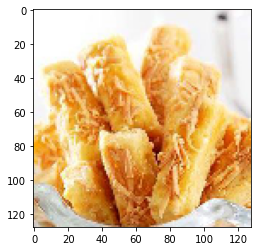

1/1 [==============================] - 0s 356ms/step
13
This image most likely belong to kue-kastengel with a 7.84 percent confidence


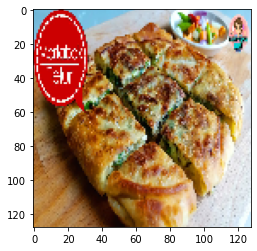

1/1 [==============================] - 0s 27ms/step
7
This image most likely belong to food-martabak-asin with a 8.06 percent confidence


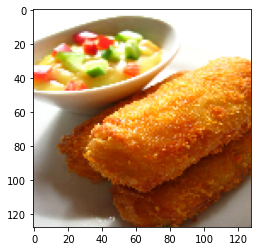

1/1 [==============================] - 0s 27ms/step
18
This image most likely belong to kue-risoles with a 8.05 percent confidence


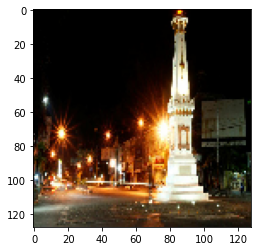

1/1 [==============================] - 0s 28ms/step
31
This image most likely belong to landmark-tugu-yogyakarta with a 8.06 percent confidence


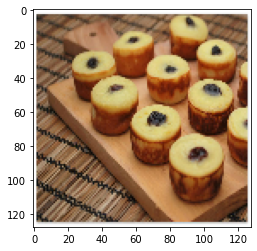

1/1 [==============================] - 0s 27ms/step
16
This image most likely belong to kue-lumpur with a 8.06 percent confidence


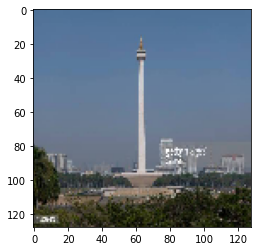

1/1 [==============================] - 0s 27ms/step
27
This image most likely belong to landmark-monas with a 8.06 percent confidence


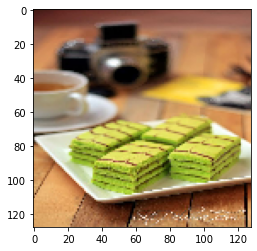

1/1 [==============================] - 0s 26ms/step
15
This image most likely belong to kue-lapis with a 8.06 percent confidence


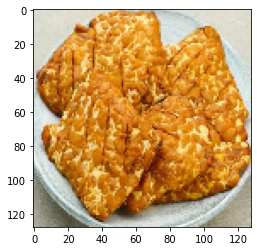

1/1 [==============================] - 0s 27ms/step
11
This image most likely belong to food-tempe-goreng with a 8.06 percent confidence


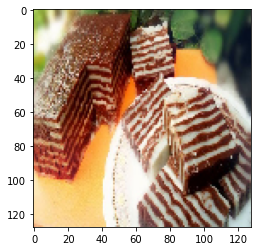

1/1 [==============================] - 0s 27ms/step
15
This image most likely belong to kue-lapis with a 8.06 percent confidence


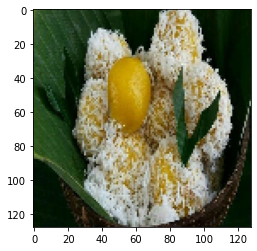

1/1 [==============================] - 0s 194ms/step
17
This image most likely belong to kue-putri-salju with a 4.97 percent confidence


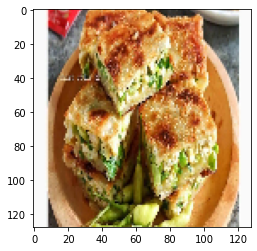

1/1 [==============================] - 0s 28ms/step
7
This image most likely belong to food-martabak-asin with a 7.88 percent confidence


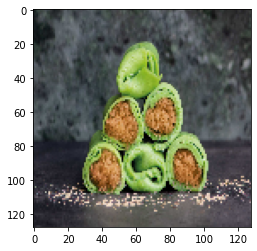

1/1 [==============================] - 0s 27ms/step
11
This image most likely belong to food-tempe-goreng with a 5.56 percent confidence


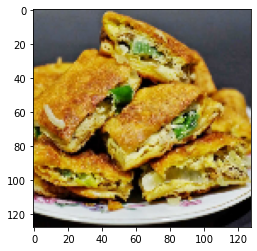

1/1 [==============================] - 0s 27ms/step
7
This image most likely belong to food-martabak-asin with a 7.90 percent confidence


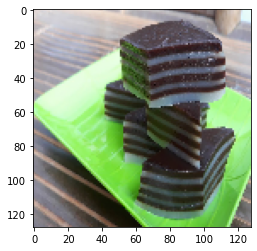

1/1 [==============================] - 0s 30ms/step
15
This image most likely belong to kue-lapis with a 8.06 percent confidence


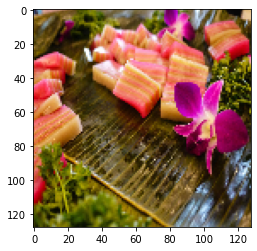

1/1 [==============================] - 0s 40ms/step
15
This image most likely belong to kue-lapis with a 8.06 percent confidence


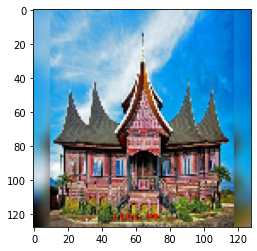

1/1 [==============================] - 0s 29ms/step
2
This image most likely belong to culture-rumah-gadang-minangkabau with a 8.06 percent confidence


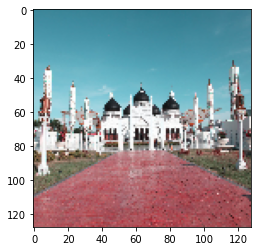

1/1 [==============================] - 0s 27ms/step
25
This image most likely belong to landmark-masjid-raya-baiturrahman with a 8.06 percent confidence


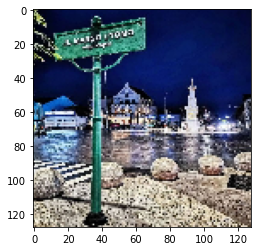

1/1 [==============================] - 0s 27ms/step
31
This image most likely belong to landmark-tugu-yogyakarta with a 6.72 percent confidence


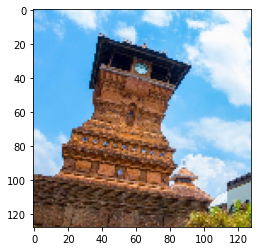

1/1 [==============================] - 0s 28ms/step
26
This image most likely belong to landmark-menara-kudus with a 8.06 percent confidence


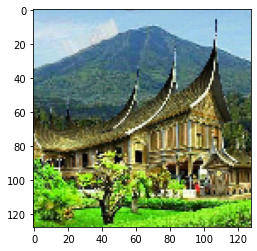

1/1 [==============================] - 0s 28ms/step
2
This image most likely belong to culture-rumah-gadang-minangkabau with a 7.21 percent confidence


In [24]:
loss, acc = new_model.evaluate(validation_data, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

class_names = dict((v,k) for k,v in label_map.items()) # Switch value and key from label map

for _ in range(20):
    img, label = validation_data.next()
    plt.imshow(img[0])
    plt.show()
    predictions = new_model.predict(img)
    score = tf.nn.softmax(predictions[0])
    
    print(np.argmax(score))
    print("This image most likely belong to {} with a {:.2f} percent confidence".format(class_names[np.argmax(score)], 100 * np.max(score)))
